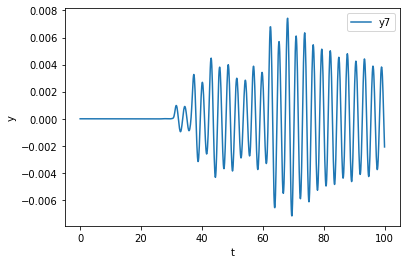

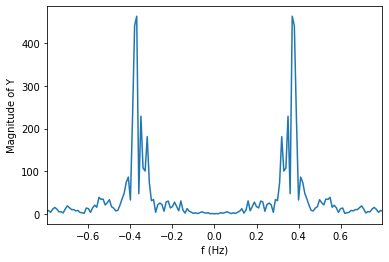

The frequency of the maxima is -0.37 Hz
The Regime is Underdamped
The forcing freq is 0.16 Hz
The natural freq is 0.36 Hz


In [70]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

'''Parameters'''

b = 0.05 # Damping
c = 5 # Restoring
F = 5.0 # Driving Amp
w = 1 # Driving frequency
osc = 7 #Oscillator were looking at
time = 100

N = 10 # Number of systems
y0 = np.zeros(2*N) # Initial values for each of the N systems
t = np.linspace(0, time, 1000) # Time range

'''Defining the driving force'''
def DrivingForce(t,w,F,y1,y2):
    if y1 < y2:
        force = F*np.sin(w*t)*(np.cos(float(y2)) - np.cos(float(y1))) ## driving force is the difference in heights
    elif y1 > y2:
        force = 0
    else:
        force = 0
    return force


def Regime(b,c):
    if b**2 - 4*c < 0:
        reg = 'Underdamped'
    elif b**2 - 4*c > 0:
        reg = 'Overdamped'
    else:
        reg = 'Somethingwrong'
    
    return reg

def GetForcingFreq(w): #Getting the forcing Freq
    ffreq = w/(2*np.pi)
    return ffreq

def GetNaturalFreq(b,c): ##Natural frequency
    nfreq = ((-(b**2 - 4*c))**0.5)/(4*np.pi)
    return nfreq

'''Defining the Odes which couple the oscillators, y_(i+1)'' + b*y_(i+1)' + cy_(i+1) = F(t)



'''
def odes(y, t, N, b, c, F, w):
    dydt = np.zeros((2*N,))
    dydt[0] = y[1]
    dydt[1] = -b*y[1] - c*y[0] + F*np.sin(w*t)
    for i in range(1, N):
        dydt[2*i] = y[2*i+1]
        
        dydt[2*i+1] = -b*y[2*i+1] - c*y[2*i] + DrivingForce(t,w,F,y[2*i],y[2*i-2])
    return dydt

# Solve the ODEs using odeint
sol = odeint(odes, y0, t, args=(N, b, c, F, w))

# Plot the solution
plt.plot(t, sol[:, 2*osc], label='y{}'.format(osc))
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

# Compute the Fourier Transform
dt = t[1] - t[0]
N = sol.shape[0]
f = np.fft.fftfreq(N, dt)
f_shift = np.fft.fftshift(f)
Y = np.fft.fft(sol[:, osc])
Y_magnitude = np.abs(np.fft.fftshift(Y))

# Plot the Fourier Transform
plt.plot(f_shift, Y_magnitude)
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude of Y')
plt.xlim((-5)*GetForcingFreq(w), 5*GetForcingFreq(w))
plt.show()

max_index = np.argmax(Y_magnitude)
frequency_of_max = f_shift[max_index]
print("The frequency of the maxima is {:.2f} Hz".format(frequency_of_max))
print("The Regime is {}".format(Regime(b,c)))
print("The forcing freq is {:.2f} Hz".format(GetForcingFreq(w)))
print("The natural freq is {:.2f} Hz".format(GetNaturalFreq(b,c)))